In [177]:
import csv
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import ast
%matplotlib inline

In [178]:
speeches1 = pd.read_csv("../data/speeches_77to80.csv", sep='\t')
speeches2 = pd.read_csv("../data/speeches_91to96.csv", sep='\t')
speeches3 = pd.read_csv("../data/speeches_97to00.csv", sep='\t')

In [179]:
speeches1

,Unnamed: 0,year,speaker,speech,n_words
0,0,1377,جنتی,"['-', 'حضور', 'پرشور', 'مردم', 'در', 'راهپیمای...",721
1,1,1377,یزدی,"['خطبه', 'اول', 'بسم', 'الله', 'الرحمن', 'الرح...",6305
2,2,1377,رفسنجانی23,"['خطبه', 'اول', 'بسم', 'الله', 'الرحمن', 'الرح...",6589
3,3,1377,جنتی,"['خطبه', 'اول.', 'بسم', 'الله', 'الرحمن', 'الر...",5311
4,4,1377,کاشانی,"['خطبه', 'اول', 'بسم', 'الله', 'الرحمن', 'الرح...",5317
...,...,...,...,...,...
114,114,1380,یزدی,"['بسم', 'الله', 'الرحمن', 'الرحیم', 'الحمد', '...",9231
115,115,1380,جنتی,"['بسم', 'الله', 'الرحمن', 'الرحیم', 'الحمد', '...",4940
116,116,1380,هاشمی,"['بسم', 'الله', 'الرحمن', 'الرحیم', 'الحمدلله'...",5246
117,117,1380,کاشانی,"['بسم', 'الله', 'الرحمن', 'الرحیم', 'الحمدالله...",3450


In [180]:
speeches2 = pd.concat([speeches2, speeches2], ignore_index=True)
speeches2

,Unnamed: 0,year,speaker,speech,n_words
0,0,1392,امامی,"['خطیب', 'نماز', 'جمعه', 'این', 'هفته', 'تهران...",1164
1,1,1392,امامی,"['خطیب', 'نماز', 'جمعه', 'این', 'هفته', 'تهران...",697
2,2,1392,صدیقی,"['خطیب', 'نماز', 'جمعه', 'این', 'هفته', 'تهران...",1208
3,3,1392,موحدی,"['امام', 'جمعه', 'ی', 'موقت', 'تهران', 'با', '...",930
4,4,1392,خاتمی,"['خطیب', 'نماز', 'جمعه', 'این', 'هفته', 'تهران...",1232
...,...,...,...,...,...
141,68,1396,خاتمی,"['خطیب', 'نماز', 'جمعه', 'این', 'هفته', 'تهران...",1219
142,69,1396,صدیقی,"['خطیب', 'نماز', 'جمعه', 'این', 'هفته', 'تهران...",872
143,70,1396,امامی,"['آیت', 'الله', 'امامی', 'کاشانی', 'گفت:', 'بی...",642
144,71,1396,صدیقی,"['امام', 'جمعه', 'موقت', 'تهران', 'اظهار', 'کر...",1109


In [181]:
speeches3

,Unnamed: 0,year,speaker,speech,n_words
0,0,1398,اکبری,"['قال', 'الحکیم', 'فی', 'کتابه', 'الکریم:', '«...",3718
1,1,1398,اکبری,"['خطبه', 'اول', '«عِبادَ', 'اللهِ', 'اُوصیکُم'...",3960
2,2,1398,اکبری,"['«عِبادَ', 'اللهِ', 'اُوصیکُم', 'وَنَفسی', 'ب...",3050
3,3,1398,اکبری,"['«عِبادَ', 'اللهِ', 'اُوصیکُم', 'وَنَفسی', 'ب...",3209
4,4,1398,اکبری,"['خطبه', 'اول', 'قال', 'الحکیم', 'فی', 'کتابه'...",3078
...,...,...,...,...,...
105,105,1398,امامی,"['امام', 'جمعه', 'موقت', 'تهران', 'از', 'همه',...",1383
106,106,1397,امامی,"['خطیب', 'جمعه', 'تهران:', 'با', 'وحدت', 'حوزه...",1160
107,107,1397,ابوترابی,"['خطیب', 'نماز', 'جمعه', 'تهران:', 'گسترش', 'ع...",1753
108,108,1397,موحدی,"['خطیب', 'جمعه', 'تهران:', 'مسئولان', 'برای', ...",1217


In [182]:
speeches = pd.concat([speeches1, speeches2, speeches3], ignore_index=True)

In [183]:
speeches = pd.concat([speeches, speeches[speeches['year']==1397]], ignore_index=True)
speeches = pd.concat([speeches, speeches[speeches['year']==1395]], ignore_index=True)
speeches = pd.concat([speeches, speeches[speeches['year']==1394]], ignore_index=True)

In [186]:
speeches.groupby('year').count()

,Unnamed: 0,speaker,speech,n_words
year,,,,
1377,7,7,7,7
1378,36,36,36,36
1379,40,40,40,40
1380,36,36,36,36
1392,32,32,32,32
1393,34,34,34,34
1394,48,48,48,48
1395,52,52,52,52
1396,34,34,34,34


In [187]:
stp_file = open("persian_stp.txt", "r")
stp_words = stp_file.read()
stp_words = stp_words.split("\n")
stp_file.close()

In [188]:
def clean_word(w):
    stp_w_flag = False
    
    symbols = ['!','"','\#','\(','\)','\*',',','-','.',':','«','»','،',
               '؛','؟','۰','۱','۲','۳','۴','۵','۶','۷','۸','۹','…', 'ی']
    for char in symbols:
        cleaned_w = re.sub(char, '', w)
        
    if w in stp_words:
        stp_w_flag = True
        cleaned_w = ''
    
    return cleaned_w, stp_w_flag

In [189]:
def clean_speeches():
    for row_i in range(len(speeches)):
        speech = ast.literal_eval(speeches.at[row_i, 'speech'])
        cleaned_speech = []
        for word in speech:
            cleaned_word, stp_w_flag = clean_word(word)
            if not stp_w_flag:
                cleaned_speech.append(cleaned_word)
        speeches.at[row_i, 'speech'] = cleaned_speech

In [190]:
clean_speeches()

In [191]:
speeches.head()

,Unnamed: 0,year,speaker,speech,n_words
0,0,1377,جنتی,"[-, حضور, پرشور, راهپما, 22, بهمن, درس, عبرت, ...",721
1,1,1377,یزدی,"[خطبه, بسم, الله, الرحمن, الرحم, الحمد, لله, ر...",6305
2,2,1377,رفسنجانی23,"[خطبه, بسم, الله, الرحمن, الرحم, والصلاه, السل...",6589
3,3,1377,جنتی,"[خطبه, اول., بسم, الله, الرحمن, الرحم., والصلا...",5311
4,4,1377,کاشانی,"[خطبه, بسم, الله, الرحمن, الرحم, نحمده, نستعنه...",5317


In [193]:
speeches.to_csv('./data/cleaned_speeches.csv', sep='\t')

In [6]:
def count_instances(df, word):
    counter = 0
    n_words_mean = df['n_words'].mean()
    for i in range(len(df)):
        row = df.iloc[i]
        for w in ast.literal_eval(row['speech']):
            if word in w:
                counter = counter + 1
    return counter/n_words_mean*100

In [7]:
def compare(word):
    count1 = (count_instances(speeches1, word))
    count2 = (count_instances(speeches2, word))
    count3 = (count_instances(speeches3, word))
    print(round(count1,2), round(count2,2), round(count3,2))

In [8]:
compare("آمریکا")

15.84 51.24 32.33


In [9]:
speeches2['n_words'].mean()

1100.6438356164383

In [12]:
speeches.groupby('year').count()

,Unnamed: 0,speaker,speech,n_words
year,,,,
1377,7,7,7,7
1378,36,36,36,36
1379,40,40,40,40
1380,36,36,36,36
1392,32,32,32,32
1393,34,34,34,34
1394,48,48,48,48
1395,52,52,52,52
1396,34,34,34,34


In [193]:
len(speeches)

448

In [13]:
YEARS = list(range(1378, 1381)) + list(range(1392, 1399)) + [1400]

In [98]:
def annual_freq(word):
    freqs = []
    for year in YEARS:
        speeches = pd.concat([speeches1, speeches2, speeches3], ignore_index=True)
        freqs.append(count_instances(speeches[speeches['year']==year], word) / len(speeches[speeches['year']==year]))
    
    return freqs

In [15]:
annual_freq('خامنه')

[0.4236525202029296,
 0.26167164569659174,
 0.13945380592678677,
 0.5213220727765614,
 0.5058680696074465,
 0.0,
 0.8165264962848044,
 1.6043638697256537,
 0.0,
 4.682183770510566,
 0.6089392278650592]

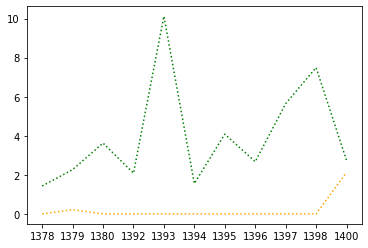

In [16]:
years_s = [str(y) for y in YEARS]
freqs = annual_freq('فساد')
plt.plot(years_s, freqs, color='green', linestyle='dotted')
# plt.plot(years[0:4], freqs[0:4], color='green')
# plt.plot(years[5:9], freqs[5:9], color='green')
freqs = annual_freq('مافیا')
plt.plot(years_s, freqs, color='orange', linestyle='dotted')
# plt.plot(years[0:4], freqs[0:4], color='orange')
# plt.plot(years[5:9], freqs[5:9], color='orange')

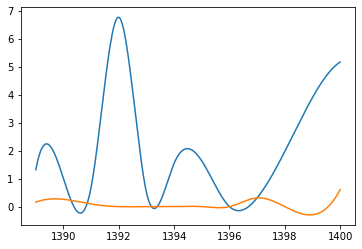

In [17]:
from scipy.interpolate import make_interp_spline

years_g = list(range(1389,1401))
years_g.remove(1399)

freqs = annual_freq('گرانی')
X_Y_Spline = make_interp_spline(years_g, freqs)
X_ = np.linspace(years_g[0], years_g[-1], 500)
Y_ = X_Y_Spline(X_)
plt.plot(X_, Y_)

freqs = annual_freq('تورم')
X_Y_Spline = make_interp_spline(years_g, freqs)
X_ = np.linspace(years_g[0], years_g[-1], 500)
Y_ = X_Y_Spline(X_)
plt.plot(X_, Y_)

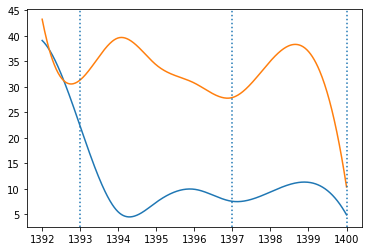

In [18]:
from scipy.interpolate import make_interp_spline

freqs = annual_freq('مذاکر')
X_Y_Spline = make_interp_spline(years_g[3:], freqs[3:])
X_ = np.linspace(years_g[3], years_g[-1], 500)
Y_ = X_Y_Spline(X_)
plt.plot(X_, Y_)


freqs = annual_freq('آمریکا')
X_Y_Spline = make_interp_spline(years_g[3:], freqs[3:])
X_ = np.linspace(years_g[3], years_g[-1], 500)
Y_ = X_Y_Spline(X_)
plt.plot(X_, Y_)
plt.axvline(x=1393, linestyle='dotted')
plt.axvline(x=1397, linestyle='dotted')
plt.axvline(x=1400, linestyle='dotted')

In [22]:
type(years)

list

In [155]:
economic_w = ['گرانی', 'تورم', 'اقتصاد', 'تحریم' , 'فقر', 'قیمت', 'بورس', 'مالیات']

In [156]:
def categorical_freqs(category_w):
    all_freqs = [0] * len(YEARS)
    for w in category_w:
        single_w_freqs = annual_freq(w)
        for i, f in enumerate(single_w_freqs):
            all_freqs[i] = all_freqs[i] + f
    
    for i, _ in enumerate(all_freqs):
            all_freqs[i] = all_freqs[i] / len(category_w)
            
    return all_freqs

In [157]:
economic_freqs = categorical_freqs(economic_w)

Text(0, 0.5, 'Frequency')

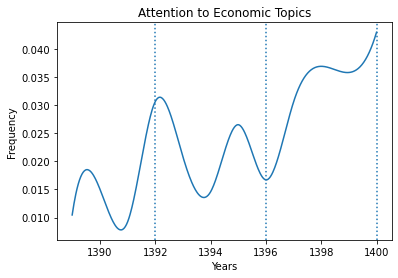

In [158]:
X_Y_Spline = make_interp_spline(years_g, economic_freqs)
X_ = np.linspace(years_g[0], years_g[-1], 500)
Y_ = X_Y_Spline(X_)
plt.plot(X_, Y_)
plt.axvline(x=1392, linestyle='dotted', label='Election')
plt.axvline(x=1396, linestyle='dotted')
plt.axvline(x=1400, linestyle='dotted')
plt.title('Attention to Economic Topics')
plt.xlabel("Years")
plt.ylabel("Frequency")

In [133]:
unpragmatic_w = ['مقاومتی', 'بانک', 'کفایی', 'مشت', 'دهان', 'شکستن', 'هسته']

Text(0, 0.5, 'Frequency')

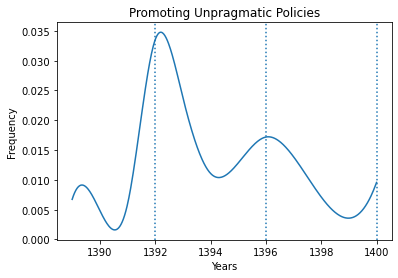

In [134]:
unpragmatic_freqs = categorical_freqs(unpragmatic_w)

X_Y_Spline = make_interp_spline(years_g, unpragmatic_freqs)
X_ = np.linspace(years_g[0], years_g[-1], 500)
Y_ = X_Y_Spline(X_)
plt.plot(X_, Y_)
plt.axvline(x=1392, linestyle='dotted')
plt.axvline(x=1396, linestyle='dotted')
plt.axvline(x=1400, linestyle='dotted')
plt.title('Promoting Unpragmatic Policies')
plt.xlabel("Years")
plt.ylabel("Frequency")

In [191]:
socialist_w = ['بیمه', 'جهادی', 'طبقات', 'بسیج', 'یارانه', 'کوپن', 'گندم']

Text(0, 0.5, 'Frequency')

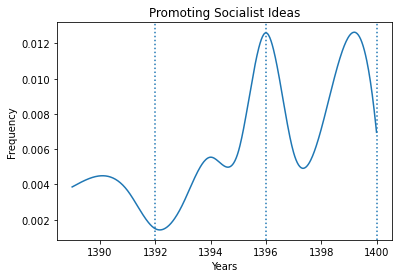

In [192]:
socialist_freqs = categorical_freqs(socialist_w)

X_Y_Spline = make_interp_spline(years_g, socialist_freqs)
X_ = np.linspace(years_g[0], years_g[-1], 500)
Y_ = X_Y_Spline(X_)
plt.plot(X_, Y_)
plt.axvline(x=1392, linestyle='dotted')
plt.axvline(x=1396, linestyle='dotted')
plt.axvline(x=1400, linestyle='dotted')
plt.title('Promoting Socialist Ideas')
plt.xlabel("Years")
plt.ylabel("Frequency")